<div class="alert alert-info">
<h2>Exploring Instacart Shopping Trends: Insights into Customer Habits and Reordering Patterns</h2>

This project will examine data released by Instacart in 2017 to determine the shopping habits of their customers.  This project will analyze data from Instacart's order information, available products, and the products in individual orders, as well as aisle and department information for their products.  After loading and cleaning the data, I will identify trends in when customers shop and in what and how much they buy.  Additionally, I will draw conclusions about how frequently customers reorder products and the order in which they select products to add to their cart.
</div>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'pandas'

In [ ]:
insta_orders = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
prods = pd.read_csv('/datasets/products.csv', sep=';')
order_prods = pd.read_csv('/datasets/order_products.csv', sep=';')
aisles = pd.read_csv('/datasets/aisles.csv', sep=';')
depts = pd.read_csv('/datasets/departments.csv', sep=';')

In [ ]:
insta_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [ ]:
prods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [ ]:
order_prods.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [ ]:
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [ ]:
depts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


Upon loading the data sets, we can see that Instacart Orders and Products in Orders are large sets of nearly 500k rows of data.  The Products data that is linked to the Products in Orders data contains information on nearly 50k products.  The Products data is linked to small data sets in the Aisles and Departments Data Frames.

## Finding and Remove Duplicate Values

### `orders` data frame

In [ ]:
# Check for duplicated orders
insta_orders[insta_orders.duplicated()]['order_id']


145574     794638
223105    2160484
230807    1918001
266232    1782114
273805    1112182
284038    2845099
311713    1021560
321100     408114
323900    1919531
345917    2232988
371905     391768
394347     467134
411408    1286742
415163    2282673
441599    2125197
Name: order_id, dtype: int64

There are 15 duplicate orders, all placed on Wednesday at 2am.

In [ ]:
# Check for all orders placed Wednesday at 2:00 AM
wed2am = insta_orders[(insta_orders['order_dow'] == 3) & (insta_orders['order_hour_of_day'] == 2)]
print(wed2am)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

In [ ]:
# Remove duplicate orders
insta_orders = insta_orders.drop_duplicates()

In [ ]:
# Double check for duplicate rows
dup_orders = insta_orders[insta_orders.duplicated()]
print(dup_orders)

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


I removed the 15 orders that were duplicates using drop_duplicates.  Upon running the same check again, the dataframe is empty and there are no more duplicate orders.

In [ ]:
# Double check for duplicate order IDs only
dup_ids = insta_orders[insta_orders.duplicated('order_id')]
print(dup_ids)

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


An additional check shows no other duplicated order_ids.

### `products` data frame

In [ ]:
# Check for fully duplicate rows
dup_prod_rows = prods[prods.duplicated()]
print(dup_prod_rows)

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


In [ ]:
# Check for just duplicate product IDs
dup_prod_ids = prods[prods.duplicated('product_id')]
print(dup_prod_ids)

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


There are no fully duplicate rows nor duplicate product IDs.

In [ ]:
# Check for just duplicate product names (convert names to lowercase to compare better)
prods['product_name'] = prods['product_name'].str.lower()
dup_prod_names = prods[prods.duplicated('product_name')]
print(dup_prod_names)

       product_id                                     product_name  aisle_id  \
71             72                                              NaN       100   
109           110                                              NaN       100   
296           297                                              NaN       100   
416           417                                              NaN       100   
436           437                                              NaN       100   
...           ...                                              ...       ...   
49689       49690                    high performance energy drink        64   
49690       49691                    original pancake & waffle mix       130   
49691       49692  organic instant oatmeal light maple brown sugar       130   
49692       49693                           spring water body wash       127   
49693       49694                          burrito- steak & cheese        38   

       department_id  
71              

However, there are some duplicate product names.

In [ ]:
# Check for duplicate product names that aren't missing
prods['product_name'] = prods['product_name'].str.lower()
dup_prod_names_fr = prods[prods.duplicated('product_name')].dropna()
print(dup_prod_names_fr)

       product_id                                     product_name  aisle_id  \
2058         2059                                  biotin 1000 mcg        47   
5455         5456                 green tea with ginseng and honey        96   
5558         5559                           cream of mushroom soup        69   
7558         7559                        cinnamon rolls with icing       105   
9037         9038                           american cheese slices        21   
...           ...                                              ...       ...   
49689       49690                    high performance energy drink        64   
49690       49691                    original pancake & waffle mix       130   
49691       49692  organic instant oatmeal light maple brown sugar       130   
49692       49693                           spring water body wash       127   
49693       49694                          burrito- steak & cheese        38   

       department_id  
2058            

Only 104 of those duplicate product names were not due to the product name missing.

### `departments` data frame

In [ ]:
# Check for fully duplicate rows
depts[depts.duplicated()]
print()
depts[depts['department_id'].duplicated()]

,department_id,department


The duplicate departments dataframe is empty.  The departments data frame is clean.

### `aisles` data frame

In [ ]:
# Check for fully duplicate rows
aisles[aisles.duplicated()]
print()
aisles[aisles['aisle_id'].duplicated()]

,aisle_id,aisle


The duplicate aisles dataframe is empty.  The aisles data frame is clean.

### `order_products` data frame

In [ ]:
# Check for fully duplicate rows
dup_order_prods = order_prods[order_prods.duplicated()]
print(dup_order_prods)

Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []


In [ ]:
# Double check for any other tricky duplicates
dups = order_prods.duplicated(['order_id', 'product_id'])
order_prods[dups].sort_values(['order_id', 'product_id'])

,order_id,product_id,add_to_cart_order,reordered


There are no fully duplicate rows nor any duplicate order_ids or product_ids.  add_to_cart_order and reordered may contain duplicate values due to the nature of the data they contain.

## Finding and Removing Missing Values


### `products` data frame

In [ ]:
prods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


Running .info() shows that the non-null count is lower for product_name than for the total number of entries.  This indicates that there are 1258 missing product names. 

In [ ]:
# Are all of the missing product names associated with aisle ID 100?
prod_names_missing = dup_prod_names[dup_prod_names['product_name'].isnull()]
pnm_aisles = prod_names_missing['aisle_id'].nunique()
print(prod_names_missing)
print(pnm_aisles)

       product_id product_name  aisle_id  department_id
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
436           437          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1257 rows x 4 columns]
1


All missing product names are associated with aisle 100 as there is only 1 unique value in the aisle_id column.

In [ ]:
# Are all of the missing product names associated with department ID 21?
pnm_dept = prod_names_missing['department_id'].nunique()
print(pnm_dept)

1


Additionally, all missing product names are associated with department 21 as there is only 1 unique value in the department_id column.

In [ ]:
## What is this aisle and department?
mask = aisles['aisle_id'] == 100
print(aisles[mask])

mask2 = depts['department_id'] == 21
print(depts[mask2])

    aisle_id    aisle
99       100  missing
    department_id department
20             21    missing


In [5]:
# Fill missing product names with 'Unknown'
prods['product_name'] = prods['product_name'].fillna('Unknown')
prods.info()

NameError: name 'prods' is not defined

### `orders` data frame

In [ ]:
print(insta_orders)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
0        1515936   183418            11          6                 13   
1        1690866   163593             5          5                 12   
2        1454967    39980             4          5                 19   
3        1768857    82516            56          0                 20   
4        3007858   196724             2          4                 12   
...          ...      ...           ...        ...                ...   
478962   3210681     5617             5          1                 14   
478963   3270802   112087             2          3                 13   
478964    885349    82944            16          2                 11   
478965    216274     4391             3          3                  8   
478966   2071924     1730            18          1                 14   

        days_since_prior_order  
0                         30.0  
1                          9.0  
2                       

In [ ]:
# Are there any missing values where it's not a customer's first order?
insta_orders[(insta_orders['order_number'] != 1)].isna().sum()

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

There are no missing values that are not a customer's first order.

### `order_products` data frame

In [ ]:
order_prods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [ ]:
order_prods.isnull().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

836 entries have a missing value in add_to_cart_order.

In [ ]:
# What are the min and max values in this column?
order_prods['add_to_cart_order'].describe()

count    4.544171e+06
mean     8.351669e+00
std      7.080368e+00
min      1.000000e+00
25%      3.000000e+00
50%      6.000000e+00
75%      1.100000e+01
max      6.400000e+01
Name: add_to_cart_order, dtype: float64

In [ ]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
miss_val_atco = order_prods[order_prods['add_to_cart_order'].isna()]
miss_val_atco

,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1
...,...,...,...,...
4505662,1800005,7411,NaN,0
4511400,1633337,260,NaN,0
4517562,404157,9517,NaN,0
4534112,1673227,17835,NaN,0


The minimum value for add_to_cart_order is 1.  The max is 64.

In [ ]:
# Do all orders with missing values have more than 64 products?
unique_ids = miss_val_atco['order_id'].unique()
filtered_orders = order_prods[order_prods['order_id'].isin(unique_ids)]
item_count = filtered_orders.groupby('order_id').size()
item_count.min()

65

All orders with missing values have more than 64 products.  Let's change that and clean up the data!

In [ ]:
# Replace missing values with 999 and convert column to integer type
order_prods['add_to_cart_order'].fillna(999, inplace=True)
order_prods['add_to_cart_order'] = order_prods['add_to_cart_order'].astype(int)
order_prods.describe()

,order_id,product_id,add_to_cart_order,reordered
count,4.545007e+06,4.545007e+06,4.545007e+06,4.545007e+06
mean,1.711166e+06,2.558084e+04,8.533887e+00,5.905025e-01
std,9.850955e+05,1.409552e+04,1.518562e+01,4.917411e-01
min,4.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,8.608170e+05,1.353500e+04,3.000000e+00,0.000000e+00
50%,1.711530e+06,2.527200e+04,6.000000e+00,1.000000e+00
75%,2.561311e+06,3.793500e+04,1.100000e+01,1.000000e+00
max,3.421079e+06,4.969400e+04,9.990000e+02,1.000000e+00


In [ ]:
order_prods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB


## Verifying Sensible Values

### Verifying that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [ ]:
insta_orders.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,4.789520e+05,478952.000000,478952.000000,478952.000000,478952.000000,450135.000000
mean,1.709953e+06,102966.654911,17.157563,2.775051,13.447034,11.101814
std,9.869537e+05,59525.292863,17.704457,2.045901,4.224567,9.190004
min,4.000000e+00,2.000000,1.000000,0.000000,0.000000,0.000000
25%,8.564698e+05,51413.750000,5.000000,1.000000,10.000000,4.000000
50%,1.709521e+06,102633.000000,11.000000,3.000000,13.000000,7.000000
75%,2.563002e+06,154419.000000,23.000000,5.000000,16.000000,15.000000
max,3.421079e+06,206209.000000,100.000000,6.000000,23.000000,30.000000


All values are sensible as the min and max for dow is 0 and 6, respectively, and the min and max for hour of day is 0 and 23, respectively.

### Shopping Time Trends

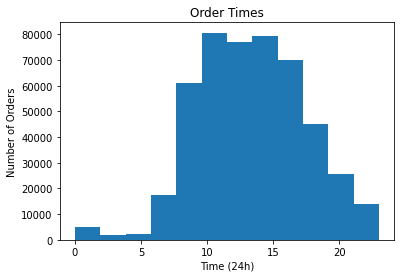

In [ ]:
insta_orders['order_hour_of_day'].plot(kind='hist', bins = 12, title='Order Times')
plt.xlabel('Time (24h)')
plt.ylabel('Number of Orders')
plt.show()

The majority of people shop from late morning through the afternoon, roughly 9am to 5pm.

### Shopping Day Trends

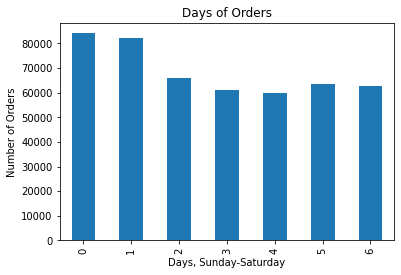

In [ ]:
order_count = insta_orders.groupby('order_dow')['order_id'].count()
order_count.plot(x='order_dow', 
                  y='order_count', 
                  title='Days of Orders', 
                  xlabel='Days, Sunday-Saturday', 
                  ylabel='Number of Orders', 
                  kind='bar')
plt.show()

People generally shop on Sundays and Mondays.

### Time between Orders

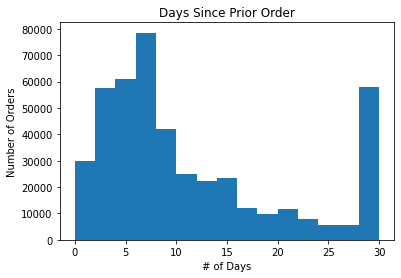

In [ ]:
insta_orders['days_since_prior_order'].plot(kind='hist', bins=15, title='Days Since Prior Order')
plt.xlabel('# of Days')
plt.ylabel('Number of Orders')
plt.show()

Most subsequent orders are placed around 1 week after the prior order.  However, there is a second spike in orders around the 30 day mark, indicating that some people prefer to shop monthly rather than weekly.

# Statistical Analysis

### Wednesday vs Saturday Shopping Time Trends

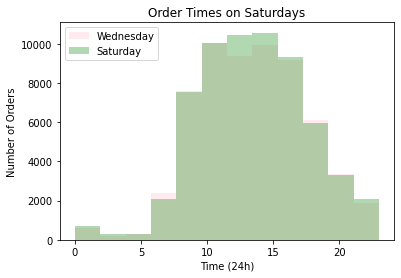

In [ ]:
wed = insta_orders[insta_orders['order_dow'] == 3]
sat = insta_orders[insta_orders['order_dow'] == 6]

wed['order_hour_of_day'].plot(kind='hist', bins=12, title='Order Times on Wednesdays', 
                              alpha=0.3, color='pink')
sat['order_hour_of_day'].plot(kind='hist', bins=12, title='Order Times on Saturdays', 
                              alpha=0.3, color='green')
plt.xlabel('Time (24h)')
plt.ylabel('Number of Orders')
plt.legend(['Wednesday', 'Saturday'])
plt.show()

Order times are consistent across both days with the majority of orders occurring from late morning through the afternoon, roughly 9am to 5pm.  This is consistent with order times on all days of the week.

### Distribution of Orders per Customer

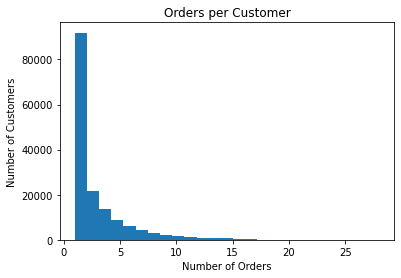

count    157437.000000
mean          3.042182
std           2.746842
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max          28.000000
Name: order_id, dtype: float64

In [ ]:
order_counts = insta_orders.groupby('user_id')['order_id'].nunique()
order_counts.plot(kind='hist', bins=25, title='Orders per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.show()
order_counts.describe()

Most customers use the service fewer than 5 times, and the majority of customers place only 1-3 orders, perhaps due to promotions for new users.

### 20 Most Popular Products

In [ ]:
pop_prods_count = order_prods.groupby('product_id')['order_id'].nunique()
pop_prods = pop_prods_count.sort_values(ascending=False).reset_index()
top_prods = pop_prods.merge(prods, on='product_id')
top_prods.head(20)

,product_id,order_id,product_name,aisle_id,department_id
0,24852,66050,banana,24,4
1,13176,53297,bag of organic bananas,24,4
2,21137,37039,organic strawberries,24,4
3,21903,33971,organic baby spinach,123,4
4,47209,29773,organic hass avocado,24,4
5,47766,24689,organic avocado,24,4
6,47626,21495,large lemon,24,4
7,16797,20018,strawberries,24,4
8,26209,19690,limes,24,4
9,27845,19600,organic whole milk,84,16


The data reveals several trends about usage of Instacart that could be used to inform ad campaigns for the platform.  The majority of orders are placed from late morning through the afternoon, roughly 10am to 4pm.  Plotting order times for Wednesday and Saturday revealed data consistent with this conclusion, suggesting order times are relatively consistent on weekdays vs weekends.  Most people shop on Sundays and Mondays.  The majority of subsequent orders are placed around 1 week after the prior order.  However, a significant number also occur around 1 month after the prior order.  However, most customers place no more than 5 orders and the majority place only 1-3 orders.  The most popular items are produce and milk.  Organic items are particularly popular and account for 75% of the most popular products.

## Additional Exploration of Order and Product Trends

### Distribution of Items per Order

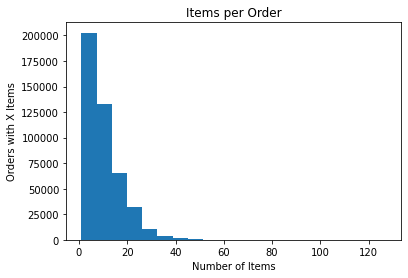

In [ ]:
items_count = order_prods.groupby('order_id')['product_id'].count()

items_count.plot(kind='hist', bins=20, title='Items per Order')
plt.xlabel('Number of Items')
plt.ylabel('Orders with X Items')
plt.show()

In [ ]:
items_count.describe()

count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
Name: product_id, dtype: float64

On average, people buy around 10 items.  Most orders are small orders of 1-5. Few people buy more than 20 items.  However, one person bought 127 items!

### Top 20 Reordered Items

In [ ]:
freq_reorders_count = order_prods.groupby('product_id')['reordered'].sum()
freq_reorders = freq_reorders_count.sort_values(ascending=False).reset_index()
top_reorders = freq_reorders.merge(prods, on='product_id')
print(top_reorders.head(20))

    product_id  reordered              product_name  aisle_id  department_id
0        24852      55763                    banana        24              4
1        13176      44450    bag of organic bananas        24              4
2        21137      28639      organic strawberries        24              4
3        21903      26233      organic baby spinach       123              4
4        47209      23629      organic hass avocado        24              4
5        47766      18743           organic avocado        24              4
6        27845      16251        organic whole milk        84             16
7        47626      15044               large lemon        24              4
8        27966      14748       organic raspberries       123              4
9        16797      13945              strawberries        24              4
10       26209      13327                     limes        24              4
11       22935      11145      organic yellow onion        83              4

The most frequently reordered items are all fresh food: produce and dairy.  Organic food is particularly popular and represents 75% of the top 20 most frequently reordered items.

### Rate of Reorder per Product

In [ ]:
grouped_prods = order_prods.groupby('product_id')['reordered'].mean().reset_index()
percent_reorders = grouped_prods.merge(prods, on='product_id')
percent_reorders

,product_id,reordered,product_name,aisle_id,department_id
0,1,0.564286,chocolate sandwich cookies,61,19
1,2,0.000000,all-seasons salt,104,13
2,3,0.738095,robust golden unsweetened oolong tea,94,7
3,4,0.510204,smart ones classic favorites mini rigatoni wit...,38,1
4,7,0.500000,pure coconut water with orange,98,7
...,...,...,...,...,...
45568,49690,0.800000,high performance energy drink,64,7
45569,49691,0.430556,original pancake & waffle mix,130,14
45570,49692,0.416667,organic instant oatmeal light maple brown sugar,130,14
45571,49693,0.440000,spring water body wash,127,11


In [ ]:
percent_reorders.describe()

,product_id,reordered,aisle_id,department_id
count,45573.000000,45573.000000,45573.000000,45573.000000
mean,24865.778312,0.386707,67.905756,11.683892
std,14338.707628,0.272132,38.292107,5.869900
min,1.000000,0.000000,1.000000,1.000000
25%,12498.000000,0.166667,36.000000,7.000000
50%,24829.000000,0.408163,69.000000,13.000000
75%,37279.000000,0.575758,100.000000,17.000000
max,49694.000000,1.000000,134.000000,21.000000


### Proportion of Reordered Products per Customer

In [ ]:
percent_reordered2 = insta_orders.merge(order_prods, on='order_id').groupby('user_id')['reordered'].mean()
percent_reordered2

user_id
2         0.038462
4         0.000000
5         0.666667
6         0.000000
7         0.928571
            ...   
206203    0.222222
206206    0.714286
206207    0.891304
206208    0.696000
206209    0.320000
Name: reordered, Length: 149626, dtype: float64

In [ ]:
percent_reordered2.describe()

count    17095.000000
mean         0.894259
std          0.102570
min          0.000000
25%          0.923077
50%          0.923077
75%          0.923077
max          1.000000
Name: reordered, dtype: float64

The vast majority of customers reorder the same items.  Of over 17k customers analyzed, nearly 90% of each order was a repeat of products previously ordered.

### Top 20 Items Placed in Cart First

What are Instacart users initially looking for when they log into the app?

In [ ]:
mask = order_prods['add_to_cart_order'] == 1
top_1st = order_prods[mask][['product_id', 'add_to_cart_order']]
top_1st_counted = top_1st.value_counts('product_id').sort_values(ascending=False).reset_index()
top_1st_names = top_1st_counted.merge(prods, on='product_id')
print(top_1st_names.head(20))

    product_id      0                 product_name  aisle_id  department_id
0        24852  15562                       banana        24              4
1        13176  11026       bag of organic bananas        24              4
2        27845   4363           organic whole milk        84             16
3        21137   3946         organic strawberries        24              4
4        47209   3390         organic hass avocado        24              4
5        21903   3336         organic baby spinach       123              4
6        47766   3044              organic avocado        24              4
7        19660   2336                 spring water       115              7
8        16797   2308                 strawberries        24              4
9        27966   2024          organic raspberries       123              4
10       44632   1914   sparkling water grapefruit       115              7
11       49235   1797          organic half & half        53             16
12       476

The data is literally bananas!  With the exception of spring water and soda, the items customers first look for on the app are all fresh food, particularly produce and dairy products.

## Conclusion
Deeper analysis into buying patterns reveals that, on average, people buy around 10 items.  However, most orders are small orders of 1-5 items and few people buy more than 20.  In general, customers rely on instacart for purchasing fresh food, like produce and dairy, and customers have a strong preference for organic items.  Indeed, the first item customers add to their carts are primarily produce and dairy, though sparkling water and soda are also in the top 20.  

As for reorders, products are reordered around 40% of the time.  Customers are fairly consistent in their purchases, however: on average, around 90% of each order are reordered products.
    
Instacart can use these conclusions to inform customer retention and advertising campaigns. Knowing that customers primarily order fresh food, for example, suggests that advertising featuring fresh produce and dairy may be more likely to attract additional customers.  Additionally, knowing when customers frequently shop could be used to plan ad placement, e.g. pushing ads midday would yield more customers than late at night.
    
It is concerning that customers rarely place more than 5 orders.  To better maintain customers, Instacart may want to offer discounts to customers who have not purchased in awhile or, knowing that 90% of the products in each order are reordered products, they may wish to introduce a targeted ad campaign advertising these products to previous customers.